<a href="https://colab.research.google.com/github/shardul28/political-stance-detection/blob/Mscproject/workingonscrapeddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
##imports
import pandas as pd
import requests
import numpy as np
import requests
import re
import nltk
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
cd /content/drive/MyDrive/news media bias datasets/scraped data/

/content/drive/MyDrive/news media bias datasets/scraped data


In [197]:
import os
datalist=os.listdir()

In [198]:
df={}
for i in os.listdir():
  df[i] = pd.read_csv(i)
  print(i)


newsapi_scrape_final.csv
newsapi_scrape3_25-02.csv
newsapi_scrape3_25-02 (1).csv
newsapi_scrape3_03-01.csv
newsapi_scrape3_03-04.csv


In [199]:
# Read in data
df= pd.concat(df, axis=0)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16504 entries, ('newsapi_scrape_final.csv', 0) to ('newsapi_scrape3_03-04.csv', 3675)
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       16504 non-null  object
 1   author       16293 non-null  object
 2   title        16488 non-null  object
 3   description  16169 non-null  object
 4   url          16488 non-null  object
 5   urlToImage   16349 non-null  object
 6   publishedAt  16488 non-null  object
 7   content      16452 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [201]:
# Replace null values
Nan = df['content'].isnull().sum()
print(f'There are {Nan} news articles that do not have content')

print(df.isnull().sum())
# Replace Null values with 'None'
df.dropna(axis = 0, how ='any', inplace = True)
print(df.isnull().sum())

df.head()

There are 52 news articles that do not have content
source           0
author         211
title           16
description    335
url             16
urlToImage     155
publishedAt     16
content         52
dtype: int64
source         0
author         0
title          0
description    0
url            0
urlToImage     0
publishedAt    0
content        0
dtype: int64


source  \
newsapi_scrape_final.csv 0  {'id': 'fox-news', 'name': 'Fox News'}   
                         1  {'id': 'fox-news', 'name': 'Fox News'}   
                         2  {'id': 'fox-news', 'name': 'Fox News'}   
                         3  {'id': 'fox-news', 'name': 'Fox News'}   
                         4  {'id': 'fox-news', 'name': 'Fox News'}   

                                      author  \
newsapi_scrape_final.csv 0     Nikolas Lanum   
                         1    Brooke Singman   
                         2  Paul Steinhauser   
                         3     Houston Keene   
                         4       Michael Lee   

                                                                        title  \
newsapi_scrape_final.csv 0  NPR labels first Asian-American Boston mayor a...   
                         1  Trump slams Biden's 'surrender' of Afghanistan...   
                         2  DeSantis, at major Republican gathering, vows ...   
                         3  Democratic California Rep. Jackie Speier will ...   
                         4  Unlikely GOP NJ Senate winner confident electi...   

                                                                  description  \
newsapi_scrape_final.csv 0  NPR took heat Tuesday after its report that As...   
                         1  <ol><li>Trump slams Biden's 'surrender' of Afg...   
                         2  <ol><li>DeSantis, at major Republican gatherin...   
                         3  <ol><li>Democratic California Rep. Jackie Spei...   
                         4  <ol><li>Unlikely GOP NJ Senate winner confiden...   

                                                                          url  \
newsapi_scrape_final.csv 0  https://www.foxnews.com/media/npr-slammed-disa...   
                         1  https://www.foxnews.com/politics/trump-slams-b...   
                         2  https://www.foxnews.com/politics/desantis-at-m...   
                         3  https://www.foxnews.com/politics/democratic-ca...   
                         4  https://www.foxnews.com/politics/unlikely-nj-g...   

                                                                   urlToImage  \
newsapi_scrape_final.csv 0  https://static.foxnews.com/foxnews.com/content...   
                         1  https://cf-images.us-east-1.prod.boltdns.net/v...   
                         2  https://static.foxnews.com/foxnews.com/content...   
                         3  https://static.foxnews.com/foxnews.com/content...   
                         4  https://static.foxnews.com/foxnews.com/content...   

                                     publishedAt  \
newsapi_scrape_final.csv 0  2021-11-16T20:04:38Z   
                         1  2021-11-07T12:11:33Z   
                         2  2021-11-06T22:08:57Z   
                         3  2021-11-16T14:40:08Z   
                         4  2021-11-10T00:04:58Z   

                                                                      content  
newsapi_scrape_final.csv 0  NPR took heat Tuesday after its report that As...  
                         1  EXCLUSIVE: Former President Donald Trump slamm...  
                         2  LAS VEGAS Republican Gov. Ron DeSantis of Flor...  
                         3  Democratic California Rep. Jackie Speier said ...  
                         4  Republican New Jersey\r\n Senate candidate Edw...

In [202]:
df['source'][1]

"{'id': 'fox-news', 'name': 'Fox News'}"

In [203]:
import json
s=df['source'][1].replace("'",'"')

s=json.loads(s)
s


{'id': 'fox-news', 'name': 'Fox News'}

In [204]:
import json
source_name=[]
for i in range(0,len(df)):
  x=json.loads(df['source'][i].replace("'",'"'))
  source_name.append(x['name'])
df['source_name']=source_name

In [205]:
df.count()

source         15835
author         15835
title          15835
description    15835
url            15835
urlToImage     15835
publishedAt    15835
content        15835
source_name    15835
dtype: int64

In [206]:
df=df.drop_duplicates(subset=['content'])
df.count()

source         4908
author         4908
title          4908
description    4908
url            4908
urlToImage     4908
publishedAt    4908
content        4908
source_name    4908
dtype: int64

In [207]:
df.isnull().sum()

source         0
author         0
title          0
description    0
url            0
urlToImage     0
publishedAt    0
content        0
source_name    0
dtype: int64

In [208]:
source_names = df.source.unique()
print(len(source_names))
source_names

10


array(["{'id': 'fox-news', 'name': 'Fox News'}",
       "{'id': 'breitbart-news', 'name': 'Breitbart News'}",
       "{'id': 'national-review', 'name': 'National Review'}",
       "{'id': 'the-american-conservative', 'name': 'The American Conservative'}",
       "{'id': 'the-washington-times', 'name': 'The Washington Times'}",
       "{'id': 'msnbc', 'name': 'MSNBC'}",
       "{'id': 'buzzfeed', 'name': 'Buzzfeed'}",
       "{'id': 'vice-news', 'name': 'Vice News'}",
       "{'id': 'cnn', 'name': 'CNN'}",
       "{'id': 'politico', 'name': 'Politico'}"], dtype=object)

In [209]:
source_bias = {'source':source_names, 'bias':[1,1,1,1,1,-1,-1,-1,-1,-1]}
source_bias_df = pd.DataFrame(data=source_bias)

df = df.merge(source_bias_df, on='source', how='left')
df.head(3)

,source,author,title,description,url,urlToImage,publishedAt,content,source_name,bias
0,"{'id': 'fox-news', 'name': 'Fox News'}",Nikolas Lanum,NPR labels first Asian-American Boston mayor a...,NPR took heat Tuesday after its report that As...,https://www.foxnews.com/media/npr-slammed-disa...,https://static.foxnews.com/foxnews.com/content...,2021-11-16T20:04:38Z,NPR took heat Tuesday after its report that As...,Fox News,1
1,"{'id': 'fox-news', 'name': 'Fox News'}",Brooke Singman,Trump slams Biden's 'surrender' of Afghanistan...,<ol><li>Trump slams Biden's 'surrender' of Afg...,https://www.foxnews.com/politics/trump-slams-b...,https://cf-images.us-east-1.prod.boltdns.net/v...,2021-11-07T12:11:33Z,EXCLUSIVE: Former President Donald Trump slamm...,Fox News,1
2,"{'id': 'fox-news', 'name': 'Fox News'}",Paul Steinhauser,"DeSantis, at major Republican gathering, vows ...","<ol><li>DeSantis, at major Republican gatherin...",https://www.foxnews.com/politics/desantis-at-m...,https://static.foxnews.com/foxnews.com/content...,2021-11-06T22:08:57Z,LAS VEGAS Republican Gov. Ron DeSantis of Flor...,Fox News,1


In [210]:
# conservative 1
# liberal -1

In [211]:
right=df.loc[df['bias']==1]
left=df.loc[df['bias']==-1]


In [212]:
print(len(right))
print(len(left))


2657
2251


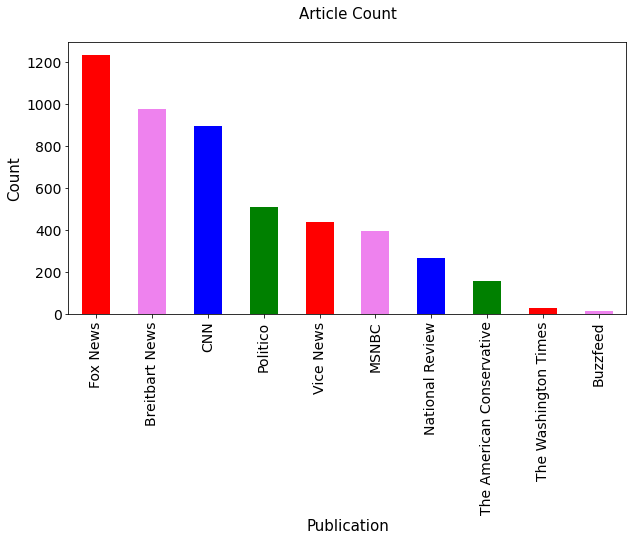

In [213]:
ax = df['source_name'].value_counts().plot(kind='bar', fontsize=14, figsize=(10,5),color=['red', 'violet','blue', 'green'])
ax.set_title('Article Count\n', fontsize=15)
ax.set_xlabel('Publication', fontsize=15)
ax.set_ylabel('Count', fontsize=15);

In [237]:
##getting all news channels list to remove channel names from content
import json
for i in source_names:
  #print(i)
  #print(type(i))
  x=json.loads(i.replace("\'", "\""))
  #print(x['id'])
  print(f"'{x['id']}','{x['name']}',")

'fox-news','Fox News',
'breitbart-news','Breitbart News',
'national-review','National Review',
'the-american-conservative','The American Conservative',
'the-washington-times','The Washington Times',
'msnbc','MSNBC',
'buzzfeed','Buzzfeed',
'vice-news','Vice News',
'cnn','CNN',
'politico','Politico',


In [238]:
import re
import string
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [239]:

def text_prepare(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower()
    text = text.replace('\n',' ')
    
    letters = list(string.ascii_lowercase)
    numbers = ['0','1','2','3','4','5','6','7','8','9']
    banned = ["’","’","“","—","”","‘","–",'#','[','/','(',')','{','}','\\','[',']','|','@',',',';','+','-']
    stopwords2=['fox-news','Fox News',
'breitbart-news','Breitbart News',
'national-review','National Review',
'the-american-conservative','The American Conservative',
'the-washington-times','The Washington Times',
'msnbc','MSNBC',
'buzzfeed','Buzzfeed',
'vice-news','Vice News',
'cnn','CNN',
'politico','Politico']
    banned = ''.join(banned) + string.punctuation + ''.join(numbers)
    boilerplate = ['  ','https','http','www', '’s', '―', '/', 'playback', 'get', 'mr', 'mrs', 'ms', 'dr', 'prof', 'news', 'report', 'unsubscribe', 'they', 'must', 'share', 'that', 'view', 'hide', 'copy', 'something', 'enlarge', 'reprint', 'read', '_', 'videos', 'autoplay', 'watched', 'press', '’ve', 'toggle', 'around', 'the', 's.', 'said', 'here©', 'ad', '#', 'andhis', 'click', 'r', 'device', 'contributed', 'advertisement', 'the washington', '&', 'follow', 'copyright', 'mrs.', 'photo', 'to', 'also', 'times', 'for', 'however', 'fox', 'this', 'copyright ©', 'ofs', 'just', 'wait', 'n’t', 'told', 'unsupported', 'i', 'caption', 'ms.', '’m', 'paste', '’re', 'replay', 'photos', 'mr.', '©', 'skip', 'watch', '2018', 'cut', 'llc', 'more', 'post', 'embed', 'blog', 'b.', 'associated', 'permission']
    stop_list = set(stopwords + boilerplate + letters+stopwords2)
    
    translation_table = dict.fromkeys(map(ord, banned), ' ')
    text = text.translate(translation_table)
    text = re.sub(' +',' ',text)
    text = ' '.join([word for word in text.split() if word not in stop_list])
    return text
  

In [240]:
cleantext=[]
for i in range(0,len(df)):
  x=text_prepare(df['content'][i])
  cleantext.append(x)
df['clean_content']=cleantext

In [241]:
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,source_name,bias,clean_content
0,"{'id': 'fox-news', 'name': 'Fox News'}",Nikolas Lanum,NPR labels first Asian-American Boston mayor a...,NPR took heat Tuesday after its report that As...,https://www.foxnews.com/media/npr-slammed-disa...,https://static.foxnews.com/foxnews.com/content...,2021-11-16T20:04:38Z,NPR took heat Tuesday after its report that As...,Fox News,1,npr took heat tuesday asian american michelle ...
1,"{'id': 'fox-news', 'name': 'Fox News'}",Brooke Singman,Trump slams Biden's 'surrender' of Afghanistan...,<ol><li>Trump slams Biden's 'surrender' of Afg...,https://www.foxnews.com/politics/trump-slams-b...,https://cf-images.us-east-1.prod.boltdns.net/v...,2021-11-07T12:11:33Z,EXCLUSIVE: Former President Donald Trump slamm...,Fox News,1,exclusive former president donald trump slamme...
2,"{'id': 'fox-news', 'name': 'Fox News'}",Paul Steinhauser,"DeSantis, at major Republican gathering, vows ...","<ol><li>DeSantis, at major Republican gatherin...",https://www.foxnews.com/politics/desantis-at-m...,https://static.foxnews.com/foxnews.com/content...,2021-11-06T22:08:57Z,LAS VEGAS Republican Gov. Ron DeSantis of Flor...,Fox News,1,las vegas republican gov ron desantis florida ...
3,"{'id': 'fox-news', 'name': 'Fox News'}",Houston Keene,Democratic California Rep. Jackie Speier will ...,<ol><li>Democratic California Rep. Jackie Spei...,https://www.foxnews.com/politics/democratic-ca...,https://static.foxnews.com/foxnews.com/content...,2021-11-16T14:40:08Z,Democratic California Rep. Jackie Speier said ...,Fox News,1,democratic california rep jackie speier tuesda...
4,"{'id': 'fox-news', 'name': 'Fox News'}",Michael Lee,Unlikely GOP NJ Senate winner confident electi...,<ol><li>Unlikely GOP NJ Senate winner confiden...,https://www.foxnews.com/politics/unlikely-nj-g...,https://static.foxnews.com/foxnews.com/content...,2021-11-10T00:04:58Z,Republican New Jersey\r\n Senate candidate Edw...,Fox News,1,republican new jersey senate candidate edward ...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True